In [18]:
import numpy as np
import bandana as bd
import glob as g
from natsort import natsorted
import matplotlib.pyplot as plt

In [2]:
from imp import reload
reload(bd)

<module 'bandana' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\bandana\\__init__.py'>

In [3]:
fdir = r'../calculations/rubrene_1'

### Parsing HOMO and LUMO indices

In [4]:
nhomo, nlumo = bd.parser.parse_homo_lumo(fdir + r'/outfile')
print('HOMO index = {} \nLUMO index = {}'.format(nhomo, nlumo))

HOMO index = 1123 
LUMO index = 1125


### Parsing and symmetrizing the band structure

In [7]:
files = natsorted(g.glob(fdir + r'/*.out'))

In [43]:
bands = []
for bid in range(nhomo, nhomo-18, -2):
    bands.append(bd.parser.parse_bands(files, bid).tolist())

bands = np.asarray(bands)

In [44]:
bands.shape

(9, 51, 10)

In [45]:
padbands = bd.parser.sympad(bands, ((0, 0), (150, 100), (50, 50)))

### Band structure surface visualization

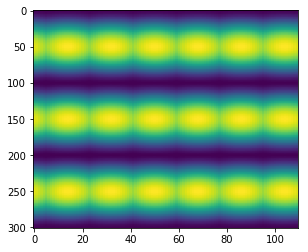

In [46]:
plt.imshow(padbands[0,...], aspect=0.3)

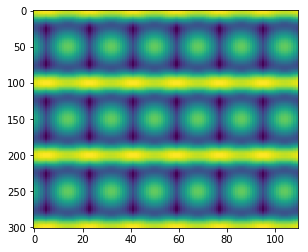

In [51]:
plt.imshow(padbands[4,...], aspect=0.3)

In [39]:
import plotly.plotly as py
import plotly.graph_objs as go

In [54]:
data = [go.Surface(z=padbands[i,:,:], showscale=False) for i in range(0, 9, 1)]

layout = go.Layout(
    scene=dict(xaxis=dict(ticks='', showticklabels=False, title='kx', linewidth=3, titlefont=dict(size=30)),
               aspectratio=dict(x=1, y=1, z=1),
    yaxis=dict(ticks='', showticklabels=False, title='ky', linewidth=3, titlefont=dict(size=30)),
    zaxis=dict(ticks='', showticklabels=False, title='Energy', linewidth=3, titlefont=dict(size=30))),
    title='Rubrene_DFT_Bands',
    autosize=False,
    width=600,
    height=600,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
f = go.Figure(data=data, layout=layout)
py.iplot(f, filename='rubrene_vb_')

The draw time for this plot will be slow for clients without much RAM.


C:\ProgramData\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow

